In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_data_df = pd.merge(city_data_df, ride_data_df, how='outer', on='city')
combined_data_df

# Display the data table for preview
combined_data_df.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

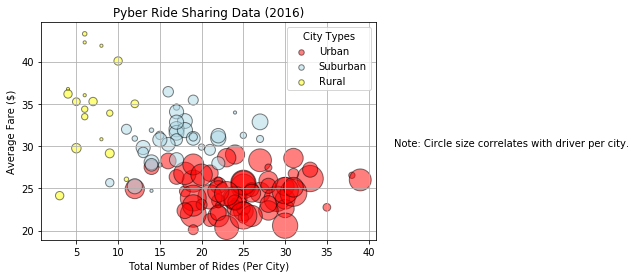

In [48]:
# Obtain the x and y coordinates for each of the three city types
urban_type = combined_data_df.loc[combined_data_df['type'] == 'Urban']
urban_avgfare = urban_type.groupby(['city']).mean()
ua_y = list(urban_avgfare['fare'])
u_driver = list(urban_avgfare['driver_count'])
u_scale = [i * 10 for i in u_driver]

urban_total = urban_type.groupby(['city']).count()
ua_x = list(urban_total['fare'])

sub_type = combined_data_df.loc[combined_data_df['type'] == 'Suburban']
sub_avgfare = sub_type.groupby(['city']).mean()
sa_y = list(sub_avgfare['fare'])
s_driver = list(sub_avgfare['driver_count'])
s_scale = [i * 10 for i in s_driver]

sub_total = sub_type.groupby(['city']).count()
sa_x = list(sub_total['fare'])

rural_type = combined_data_df.loc[combined_data_df['type'] == 'Rural']
rural_avgfare = rural_type.groupby(['city']).mean()
ra_y = list(rural_avgfare['fare'])
r_driver = list(rural_avgfare['driver_count'])
r_scale = [i * 10 for i in r_driver]

rural_total = rural_type.groupby(['city']).count()
ra_x = list(rural_total['fare'])

# Build the scatter plots for each city types
plt.scatter(ua_x, ua_y, marker="o", facecolors="red", edgecolors="black", s=u_scale, alpha=0.5, label="Urban", linewidths=1)
plt.scatter(sa_x, sa_y, marker="o", facecolors="lightblue", edgecolors="black", s=s_scale, alpha=0.5, label="Suburban", linewidths=1)
plt.scatter(ra_x, ra_y, marker="o", facecolors="yellow", edgecolors="black", s=r_scale, alpha=0.5, label="Rural", linewidths=1)
plt.grid()

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=10, title="City Types")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(43, 30,'Note: Circle size correlates with driver per city.')
# Save Figure
plt.savefig("Pyber Ride Sharing Data (2016).png")
plt.show()

## Total Fares by City Type

<function matplotlib.pyplot.show(*args, **kw)>

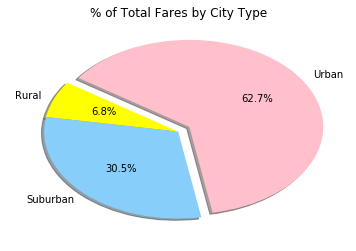

In [50]:
# Calculate Type Percents
urban_tf = urban_type.groupby("city").sum()["fare"].sum()
sub_tf = sub_type.groupby("city").sum()["fare"].sum()
rural_tf = rural_type.groupby("city").sum()["fare"].sum()
cities_tf = [urban_tf, rural_tf, sub_tf]
explode = (0.1, 0, 0)
labels = 'Urban', 'Rural', 'Suburban'
colors = ['pink', 'yellow', 'lightskyblue']
# Build Pie Chart
plt.pie(cities_tf, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=280)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("% of Total Fares by City Type.png")
plt.show

## Total Rides by City Type

<function matplotlib.pyplot.show(*args, **kw)>

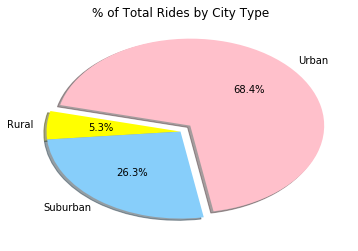

In [51]:
# Calculate Ride Percents
urban_tr = urban_type.groupby("city").count()["fare"].sum()
sub_tr = sub_type.groupby("city").count()["fare"].sum()
rural_tr = rural_type.groupby("city").count()["fare"].sum()
cities_tr = [urban_tr, rural_tr, sub_tr]
explode = (0.1, 0, 0)
labels = 'Urban', 'Rural', 'Suburban'
colors = ['pink', 'yellow', 'lightskyblue']
# Build Pie Chart
plt.pie(cities_tr, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=280)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("% of Total Rides by City Type.png")
plt.show

## Total Drivers by City Type

<function matplotlib.pyplot.show(*args, **kw)>

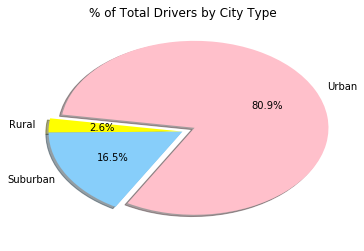

In [52]:
# Calculate Ride Percents
urban_td = urban_type.groupby("city").first()["driver_count"].sum()
sub_td = sub_type.groupby("city").first()["driver_count"].sum()
rural_td = rural_type.groupby("city").first()["driver_count"].sum()
cities_td = [urban_td, rural_td, sub_td]
explode = (0.1, 0, 0)
labels = 'Urban', 'Rural', 'Suburban'
colors = ['pink', 'yellow', 'lightskyblue']
# Build Pie Chart
plt.pie(cities_td, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=240)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("% of Total Drivers by City Type.png")
plt.show